In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
data=pd.read_csv('/content/machine_failure_dataset.csv')

In [6]:
data

,Temperature,Pressure,Humidity,Vibration,Load,RPM,Oil_Quality,Failure
0,74.967142,89.822579,23.339984,-0.482834,89.643278,1369.495253,0.049030,0
1,68.617357,95.417508,79.146056,9.302049,86.990731,1499.931090,0.501811,0
2,76.476885,91.039284,68.001109,4.425389,61.706026,1820.233075,0.649667,0
3,85.230299,101.656271,72.128544,4.620865,66.000226,1663.406770,0.424483,1
4,67.658466,117.957678,61.657657,4.879968,89.431410,1724.710439,0.563205,0
...,...,...,...,...,...,...,...,...
9995,83.011021,105.817410,73.616846,1.191814,61.321967,1238.628081,0.589798,0
9996,50.016550,120.660499,59.011883,5.172053,64.108471,1473.939828,0.715923,0
9997,62.946833,105.675310,64.331416,7.660256,98.911820,1787.528210,0.645707,0
9998,74.957656,125.702946,57.299688,1.408770,67.146838,1368.844725,0.069505,1


In [7]:
#data analysing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  10000 non-null  float64
 1   Pressure     10000 non-null  float64
 2   Humidity     10000 non-null  float64
 3   Vibration    10000 non-null  float64
 4   Load         10000 non-null  float64
 5   RPM          10000 non-null  float64
 6   Oil_Quality  10000 non-null  float64
 7   Failure      10000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 625.1 KB


In [16]:
data.shape

(10000, 8)

In [8]:
#data preprocessing
data.isnull().sum()

,0
Temperature,0
Pressure,0
Humidity,0
Vibration,0
Load,0
RPM,0
Oil_Quality,0
Failure,0


In [ ]:
#delete the null values
#data.dropna(inplace=True)

In [ ]:
data.dtypes

,0
Machine_ID,int64
Temperature,float64
Vibration,float64
Pressure,float64
Operating_Hours,int64
Maintenance_History,int64
Failure_History,int64
Age,int64
Load,float64
Failure_Prediction,int64


In [17]:
data.head()

,Temperature,Pressure,Humidity,Vibration,Load,RPM,Oil_Quality,Failure
0,74.967142,89.822579,23.339984,-0.482834,89.643278,1369.495253,0.049030,0
1,68.617357,95.417508,79.146056,9.302049,86.990731,1499.931090,0.501811,0
2,76.476885,91.039284,68.001109,4.425389,61.706026,1820.233075,0.649667,0
3,85.230299,101.656271,72.128544,4.620865,66.000226,1663.406770,0.424483,1
4,67.658466,117.957678,61.657657,4.879968,89.431410,1724.710439,0.563205,0


In [19]:
#graphical correlation table
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature,Pressure,Humidity,Vibration,Load,RPM,Oil_Quality,Failure
Temperature,1.000000,-0.008553,-0.008334,0.011712,0.010378,0.009125,-0.015834,0.304587
Pressure,-0.008553,1.000000,0.005262,0.006527,0.013196,-0.010303,0.007359,0.265529
Humidity,-0.008334,0.005262,1.000000,0.007413,0.013693,0.003693,0.007515,-0.002332
Vibration,0.011712,0.006527,0.007413,1.000000,-0.005002,-0.004530,0.002796,0.138248
Load,0.010378,0.013196,0.013693,-0.005002,1.000000,0.009582,0.011564,0.000820
RPM,0.009125,-0.010303,0.003693,-0.004530,0.009582,1.000000,-0.006338,-0.006100
Oil_Quality,-0.015834,0.007359,0.007515,0.002796,0.011564,-0.006338,1.000000,-0.177773
Failure,0.304587,0.265529,-0.002332,0.138248,0.000820,-0.006100,-0.177773,1.000000


<Axes: xlabel='Temperature', ylabel='Pressure'>

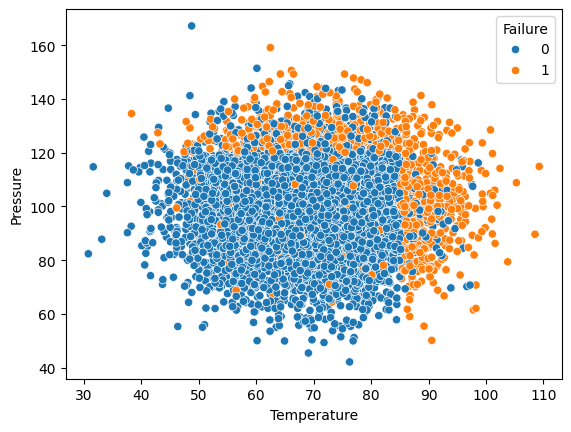

In [21]:
sns.scatterplot(x='Temperature', y='Pressure', hue='Failure', data=data)

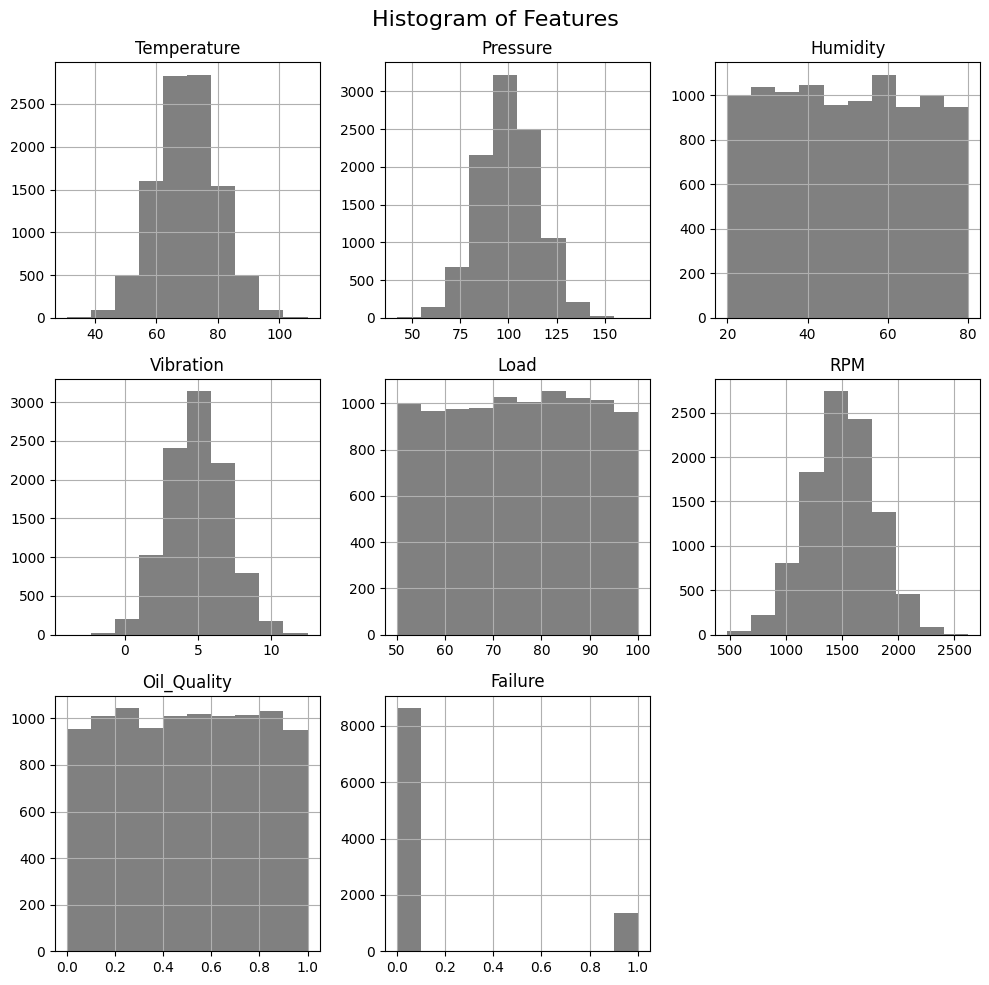

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the features you want to plot (excluding 'Machine_ID' and 'Failure_Prediction')
features_to_plot =['Temperature','Pressure','Humidity','Vibration','Load','RPM','Oil_Quality','Failure']

# Create the histogram plot
data[features_to_plot].hist(figsize=(10, 10), color='grey')
plt.suptitle('Histogram of Features', fontsize=16) # Add a title to the entire figure
plt.tight_layout() # Adjust layout to prevent overlapping


<Axes: xlabel='Temperature', ylabel='Count'>

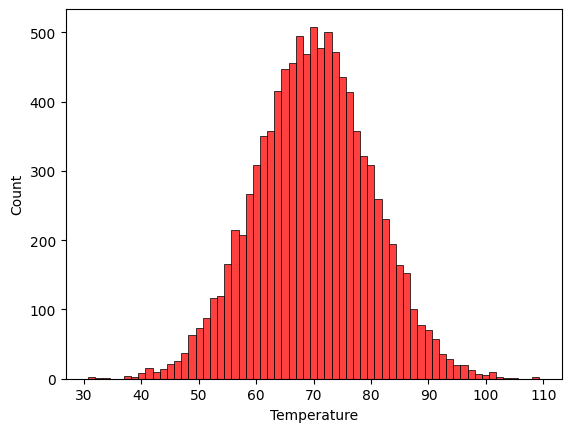

In [11]:
#histograme of temparature
sns.histplot(data['Temperature'],color='red')

In [ ]:
#pair plot with violet color
#sns.pairplot(data,hue='Failure_Prediction',palette='viridis')

In [12]:
# Split data into features (X) and target variable (y)
X = data.drop('Failure', axis=1)
y = data['Failure']

In [13]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#feature scalling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**LOGISTIC** **REGRESSION**

In [15]:
# Choose a machine learning model (e.g., Logistic Regression)
model = LogisticRegression()

In [16]:
#Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
model.score(X_train,y_train)

0.89025

In [19]:
model.score(X_test,y_test)

0.888

**RANDOM** **FOREST**

In [20]:
model2=RandomForestClassifier()
model2.fit(X_train,y_train)

y_pred=model2.predict(X_test)

In [21]:
model2.score(X_train,y_train)

1.0

In [22]:
model2.score(X_test,y_test)

0.954

**DECISION** **TREE** **CLASSIFIER**

In [23]:
model3=DecisionTreeClassifier()

#train the model
model3.fit(X_train,y_train)

y_pred=model3.predict(X_test)

model.score(X_train,y_train)

0.89025

In [24]:
model.score(X_test,y_test)

0.888

**SUPPORT** **VECTOR** **MACHINE**

In [25]:
model4= SVC()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
model4.score(X_train,y_train)

0.93525

In [26]:
model4.score(X_test,y_test)

0.917

In [27]:
#linear
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
svm.score(X_train,y_train)

0.88675

In [28]:
svm.score(X_test,y_test)

0.8845

In [29]:
#poly
svm1=SVC(kernel='poly')
svm1.fit(X_train,y_train)
svm1.score(X_train,y_train)

0.921

In [30]:
svm1.score(X_test,y_test)

0.911

In [31]:
#sigmoid
svm2=SVC(kernel='sigmoid')
svm2.fit(X_train,y_train)
svm2.score(X_train,y_train)

0.8135

In [32]:
svm2.score(X_test,y_test)

0.8245

In [33]:
#rbf
svm3=SVC(kernel='rbf')
svm3.fit(X_train,y_train)
svm3.score(X_train,y_train)

0.93525

In [34]:
svm3.score(X_test,y_test)

0.917

**K NEAREST NIEBOUR**

In [35]:
#KNN
model5=KNeighborsClassifier()
model5.fit(X_train,y_train)

y_pred=model5.predict(X_test)

model5.score(X_train,y_train)

0.932125

In [36]:
model5.score(X_test,y_test)

0.9065

**NAIVE BAYES**

In [37]:
#Naive Bias
model6=GaussianNB()
model6.fit(X_train,y_train)

y_pred=model6.predict(X_test)

model6.score(X_train,y_train)

0.892375

In [38]:
model6.score(X_test,y_test)

0.891

**XG BOOSTING**

In [39]:
#xgbooster
model7=XGBClassifier()

model7.fit(X_train,y_train)

y_pred=model7.predict(X_test)

model7.score(X_train,y_train)

1.0

In [40]:
model7.score(X_test,y_test)

0.949

**ENSEMBLE MODEL**

In [41]:
ensemble_model = GaussianNB()
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy:", accuracy_ensemble)


Ensemble Model Accuracy: 0.891


**CROSS VALIDATION**

In [42]:
from sklearn.model_selection import cross_val_score

ensemble_model = RandomForestClassifier()
ensemble_model.fit(X_train, y_train)

# Now cross_val_score should work correctly
scores = cross_val_score(ensemble_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy scores:", scores.mean())


Cross-validation scores: [0.9585 0.9525 0.9535 0.9495 0.9525]
Mean accuracy scores: 0.9532999999999999


**GridSearchCV**

In [43]:
param_grid = {
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "Support Vector Machine": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7]},
    "Decision Tree": {"max_depth": [None, 5, 10]}
}

# Define the models you want to use in a dictionary
models = {
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

best_models = {}
for name, params in param_grid.items():
    grid_search = GridSearchCV(models[name], params, cv=5, scoring="accuracy") # Now using the 'models' dictionary
    grid_search.fit(X_train, y_train) # Assuming X_train_scaled is a typo and should be X_train
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Best parameters for Support Vector Machine: {'C': 1, 'kernel': 'rbf'}
Best parameters for K-Nearest Neighbors: {'n_neighbors': 5}
Best parameters for Decision Tree: {'max_depth': 5}


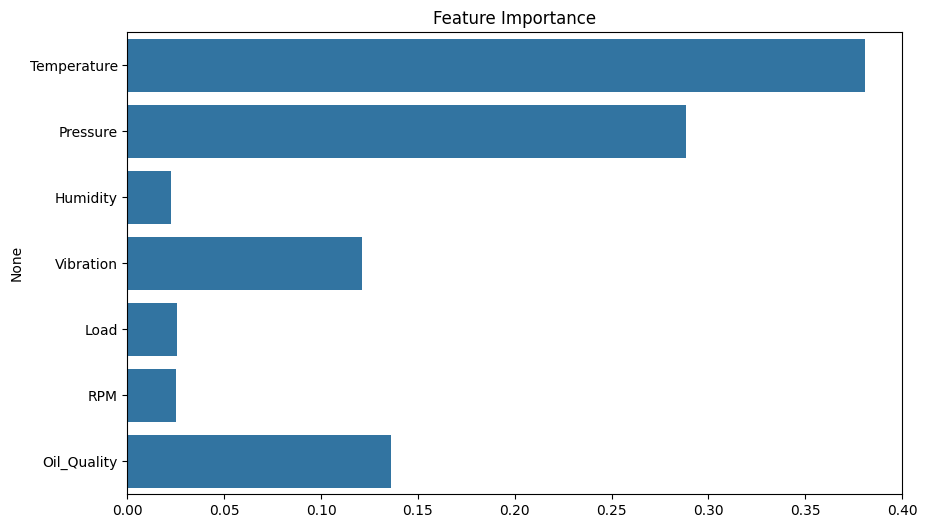

In [44]:
# Feature importance (for tree-based models)
rf = best_models["Random Forest"]
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

In [45]:
#joblib
import joblib
joblib.dump(best_models,'project.pkl')

['project.pkl']